In [2]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
data_file = "/content/drive/My Drive/10 Academy/data_W6/data.csv"
variable_definitions_file = "/content/drive/My Drive/10 Academy/data_W6/Xente_Variable_Definitions.csv"

# Now you can use these paths for your analysis

Mounted at /content/drive


In [4]:
import os

folder_path = "/content/drive/My Drive/10 Academy/data_W6"
print(os.listdir(folder_path))  # Check available files

['data.csv', 'Xente_Variable_Definitions.csv']


In [5]:
df = pd.read_csv(data_file, index_col=False)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.shape

(95662, 16)

In [8]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [11]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [12]:
# Check the frequency of 'FraudResult'
fraud_result_frequency = df['FraudResult'].value_counts()
print(fraud_result_frequency)

FraudResult
0    95469
1      193
Name: count, dtype: int64


In [14]:
# Check the frequency of 'FraudResult'
fraud_result_frequency = df['Amount'].value_counts()
print(fraud_result_frequency)

Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
-5.98             1
 101500.00        1
 101350.00        1
 9585.00          1
 5890.00          1
Name: count, Length: 1676, dtype: int64


In [6]:
fraud_result_frequency = df['Value'].value_counts()
print(fraud_result_frequency)

Value
1000     19407
5000      9376
50        8526
10000     7944
500       5807
         ...  
9899         1
177          1
1226         1
608          1
5890         1
Name: count, Length: 1517, dtype: int64


In [8]:
# check target balance (BAD)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [9]:
df.stb.freq(['ProductCategory'],style=True)

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


In [11]:
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


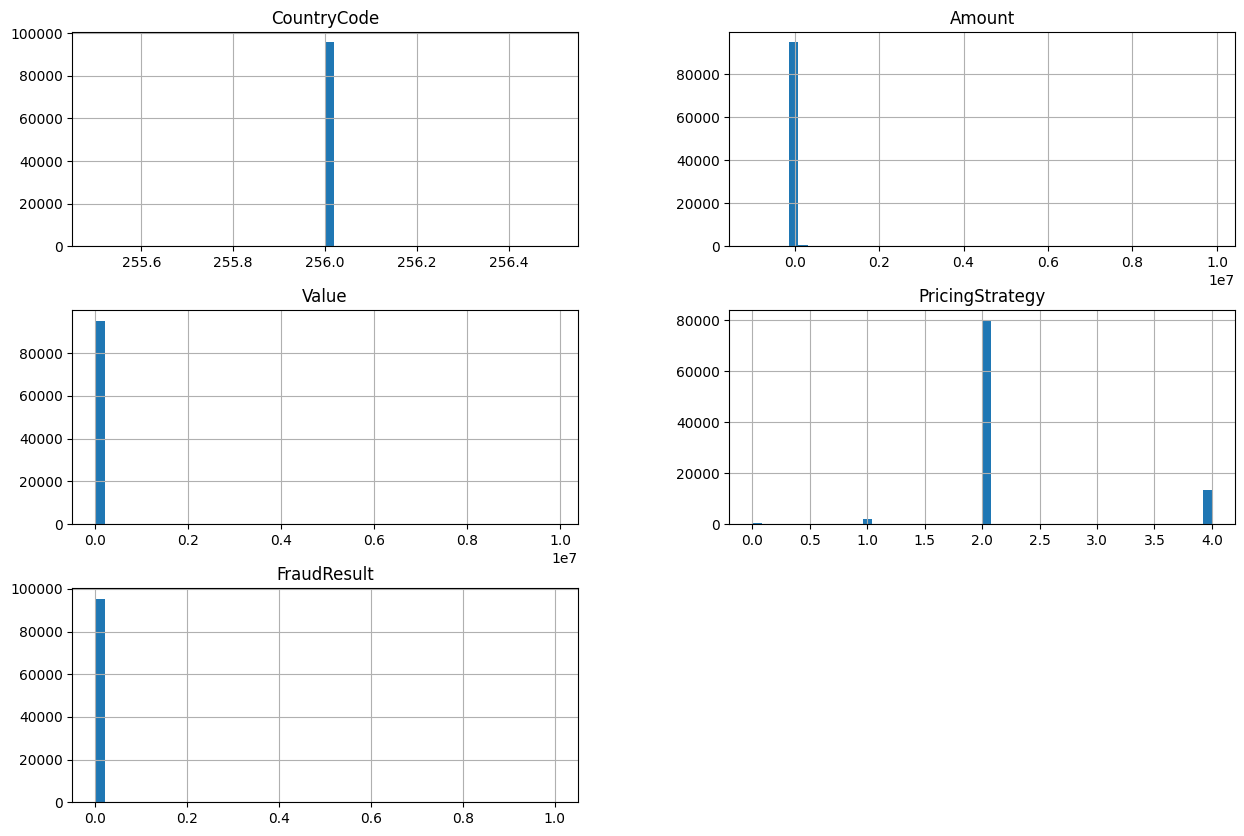

In [13]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [14]:
df.stb.freq(['ProductCategory'],style=True)

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


In [15]:
df['ProductCategory']=df['ProductCategory'].fillna('financial_services')

In [16]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [17]:
df['CountryCode'] = df['CountryCode'].fillna(df['CountryCode'].median())
df['Amount'] = df['Amount'].fillna(df['Amount'].median())
df['Value'] = df['Value'].fillna(df['Value'].median())
df['PricingStrategy'] = df['PricingStrategy'].fillna(df['PricingStrategy'].median())
df['FraudResult'] =df['FraudResult'].fillna(df['FraudResult'].median())

**`Bivarate Analysis`**

In [18]:
numeric_df =df.select_dtypes(include=['number'])

In [19]:
numeric_df.corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


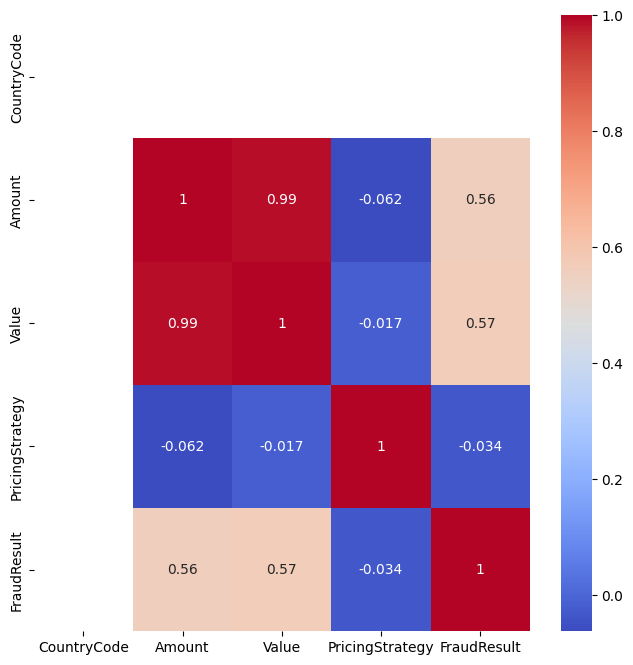

In [20]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

* **Information Value (IV):**
   * IV measures the predictive power of a feature in relation to a binary target variable. It quantifies how well a feature separates the classes (e.g., default vs. non-default).
   * IV is calculated based on the distribution of the feature values across the target classes and is particularly useful for binary classification problems.

* **Correlation:**

  * **Correlation** measures the strength and direction of a linear relationship between two continuous variables. It quantifies how changes in one variable are associated with changes in another.
  * The most common measure is Pearson's correlation coefficient, which ranges from -1 to +1.

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create aggregate features
df['total_transaction_amount'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['average_transaction_amount'] = df.groupby('CustomerId')['Amount'].transform('mean')
df['transaction_count'] = df.groupby('CustomerId')['Amount'].transform('count')

In [22]:
import pandas as pd
# Ensure column is a Pandas Series
df['TransactionStartTime'] = pd.Series(df['TransactionStartTime'])

# Convert to string, handling NaNs
df['TransactionStartTime'] = df['TransactionStartTime'].astype(str)

# Remove 'Z' if present
df['TransactionStartTime'] = df['TransactionStartTime'].str.rstrip('Z')

# Convert to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# Extract time-based features
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month

print(df[['TransactionStartTime', 'transaction_hour']].head())

  TransactionStartTime  transaction_hour
0  2018-11-15 02:18:49                 2
1  2018-11-15 02:19:08                 2
2  2018-11-15 02:44:21                 2
3  2018-11-15 03:32:55                 3
4  2018-11-15 03:34:21                 3


In [23]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['ProductCategory', 'ChannelId'], drop_first=True)

In [30]:
numerical_columns = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']

In [31]:
# Label Encoding for CurrencyCode
label_encoder = LabelEncoder()
df['CurrencyCode'] = label_encoder.fit_transform(df['CurrencyCode'])

# 4. Handle Missing Values
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [24]:
# Handle missing values
df['Amount'].fillna(df['Amount'].median(), inplace=True)

<ipython-input-24-4e866e1215d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)


In [32]:
# from sklearn.preprocessing import StandardScaler

# # Define the scaler
# scaler = StandardScaler()

# # Identify numerical columns
# numerical_features = [
#     'Amount', 'Value', 'total_transaction_amount', 'average_transaction_amount',
#     'transaction_count', 'transaction_hour', 'transaction_day', 'transaction_month'
# ]

# # Normalize numerical features
# df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [33]:
# print(df[numerical_features])

In [38]:
# # Step 1: Uninstall and reinstall xverse to ensure the latest version
# !pip uninstall xverse -y
# !pip install xverse --upgrade --quiet

# # Step 2: Restart the runtime (uncomment the next line if needed)
# # import os
# # os._exit(00)

# # Step 3: Import the necessary library
# try:
#     from xverse.ensemble import MonotonicBinning
#     # If import is successful, proceed
#     clf = MonotonicBinning()
#     df_transformed = clf.fit_transform(df, 'FraudResult')

#     # Save the preprocessed dataset
#     df_transformed.to_csv("preprocessed_credit_risk_data.csv", index=False)
#     print("Preprocessed dataset saved as 'preprocessed_credit_risk_data.csv'")

# except ImportError as e:
#     print(f"Error: {e}")

#     # If MonotonicBinning is not available, try using an alternative method (Weight of Evidence)
#     try:
#         from xverse.transformer import WOE
#         clf = WOE()
#         df_transformed = clf.fit_transform(df, 'FraudResult')

#         # Save the preprocessed dataset
#         df_transformed.to_csv("preprocessed_credit_risk_data.csv", index=False)
#         print("Preprocessed dataset saved as 'preprocessed_credit_risk_data.csv' using WOE.")
#     except Exception as ex:
#         print(f"Error: {ex}. Both MonotonicBinning and WOE are unavailable.")


In [40]:
# # 1. Construct Default Estimator (Proxy)
# # Use RFMS (Recency, Frequency, Monetary, Stability) to classify users
# df['RFMS_Score'] = (
#     df['TotalTransactionAmount'] + df['TransactionCount'] + df['StdTransactionAmount']
# )
# df['RiskCategory'] = np.where(df['RFMS_Score'] > df['RFMS_Score'].median(), 'Good', 'Bad')

# # 2. Assign Good and Bad Labels
# df['RiskLabel'] = df['RiskCategory'].apply(lambda x: 1 if x == 'Good' else 0)

# # 3. Perform WoE Binning
# from xverse.transformer import WOE
# woe = WOE()
# df = woe.fit_transform(df, 'RiskLabel')